<a href="https://colab.research.google.com/github/YesithW/PipeFitting_Maintenance/blob/main/Mechanical_Fitting_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("binovi/mechanical-fitting-failure-data")

print("Path to dataset files:", path)

100%|██████████| 2.15M/2.15M [00:00<00:00, 27.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/binovi/mechanical-fitting-failure-data/versions/2


In [ ]:
import pandas as pd
import os

# Find your CSV file
for file in os.listdir(path):
    if file.endswith(".csv"):
        data_path = os.path.join(path, file)

# Load it
df = pd.read_csv(data_path)
df.head()


,DATAFILE_AS_OF,FORM_REV,OPERATOR_ID,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,REPORT_DATE,FILING_DATE,OPERATOR_NAME,...,SECOND_PIPE_MATERIAL_OTHER,SECOND_PIPE_PLASTIC_TEXT,SECOND_PIPE_PLASTIC_OTHER,LEAK_CAUSE_TEXT,LEAK_CAUSE_OTHER,NF_THERMAL_EXP_TEXT,EX_DAMAGE_OCCURRED_TEXT,MAT_WELDS_LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT,MFF_NUMBER_FROM_OPERATOR
0,4/3/2018,7100.1-2 10-2014,1209,2018,20180227120985471,85414,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00028186
1,4/3/2018,7100.1-2 10-2014,1209,2018,20180219120985470,85413,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,POLYETHYLENE (PE),NaN,CORROSION,NaN,NaN,NaN,NaN,LEAKED THROUGH BODY,00028008
2,4/3/2018,7100.1-2 10-2014,1209,2018,20180216120985468,85411,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00027950
3,4/3/2018,7100.1-2 10-2014,1209,2018,20180215120985467,85410,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00027949
4,4/3/2018,7100.1-2 10-2014,1209,2018,20180215120985466,85409,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,NATURAL FORCES,NaN,NO,NaN,NaN,LEAKED THROUGH SEAL,00027912


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DATAFILE_AS_OF                 85611 non-null  object
 1   FORM_REV                       85611 non-null  object
 2   OPERATOR_ID                    85611 non-null  int64 
 3   REPORT_YEAR                    85611 non-null  int64 
 4   REPORT_NUMBER                  85611 non-null  int64 
 5   SUPPLEMENTAL_NUMBER            85611 non-null  int64 
 6   REPORT_TYPE                    85611 non-null  object
 7   REPORT_DATE                    85611 non-null  object
 8   FILING_DATE                    85611 non-null  object
 9   OPERATOR_NAME                  85611 non-null  object
 10  HQ_ADDRESS_STREET              85611 non-null  object
 11  HQ_ADDRESS_CITY                85611 non-null  object
 12  HQ_ADDRESS_COUNTY              6266 non-null   object
 13  H

In [ ]:
# Show value counts for the column
repeated_values = df['NF_THERMAL_EXP_TEXT'].value_counts()

# Filter only repeated ones
repeated_values = repeated_values[repeated_values > 1]

print("Repeated values:")
print(repeated_values)


Repeated values:
NF_THERMAL_EXP_TEXT
YES    6424
NO     6421
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DATAFILE_AS_OF                 85611 non-null  object
 1   FORM_REV                       85611 non-null  object
 2   OPERATOR_ID                    85611 non-null  int64 
 3   REPORT_YEAR                    85611 non-null  int64 
 4   REPORT_NUMBER                  85611 non-null  int64 
 5   SUPPLEMENTAL_NUMBER            85611 non-null  int64 
 6   REPORT_TYPE                    85611 non-null  object
 7   REPORT_DATE                    85611 non-null  object
 8   FILING_DATE                    85611 non-null  object
 9   OPERATOR_NAME                  85611 non-null  object
 10  HQ_ADDRESS_STREET              85611 non-null  object
 11  HQ_ADDRESS_CITY                85611 non-null  object
 12  HQ_ADDRESS_COUNTY              6266 non-null   object
 13  H

In [ ]:
# Remove columns by name
columns_to_drop = ['MF_INVOLVED_OTHER', 'MF_TYPE_OTHER', 'DECADE_INSTALLED', 'MANUFACTURE_OTHER', 'MANUFACTURE_MAPPED', 'LOT_NUMBER', 'LOT_ATTRIBUTES','FITTING_MATERIAL_OTHER', 'FIRST_PIPE_MATERIAL_OTHER','FIRST_PIPE_PLASTIC_OTHER',  'SECOND_PIPE_MATERIAL_OTHER', 'SECOND_PIPE_PLASTIC_OTHER', 'MFF_NUMBER_FROM_OPERATOR']
df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns have been removed
display(df.head())

,DATAFILE_AS_OF,FORM_REV,OPERATOR_ID,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,REPORT_DATE,FILING_DATE,OPERATOR_NAME,...,SECOND_PIPE_NOMINAL_SIZE_TEXT,SECOND_PIPE_UNIT_TEXT,SECOND_PIPE_MATERIAL_TEXT,SECOND_PIPE_PLASTIC_TEXT,LEAK_CAUSE_TEXT,LEAK_CAUSE_OTHER,NF_THERMAL_EXP_TEXT,EX_DAMAGE_OCCURRED_TEXT,MAT_WELDS_LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT
0,4/3/2018,7100.1-2 10-2014,1209,2018,20180227120985471,85414,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,3/4?,IPS,STEEL,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL
1,4/3/2018,7100.1-2 10-2014,1209,2018,20180219120985470,85413,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,1/2?,CTS,PLASTIC,POLYETHYLENE (PE),CORROSION,NaN,NaN,NaN,NaN,LEAKED THROUGH BODY
2,4/3/2018,7100.1-2 10-2014,1209,2018,20180216120985468,85411,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,3/4?,IPS,STEEL,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL
3,4/3/2018,7100.1-2 10-2014,1209,2018,20180215120985467,85410,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,2?,IPS,STEEL,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL
4,4/3/2018,7100.1-2 10-2014,1209,2018,20180215120985466,85409,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,1?,IPS,STEEL,NaN,NATURAL FORCES,NaN,NO,NaN,NaN,LEAKED THROUGH SEAL


In [ ]:
# Remove columns from index 0 to 15
df = df.drop(df.columns[0:16], axis=1)

# Display the first few rows to confirm the columns have been removed
display(df.head())

,FAILURE_DATE,MF_INVOLVED_TEXT,MF_TYPE_TEXT,LEAK_LOCATION_A_TEXT,LEAK_LOCATION_B_TEXT,LEAK_LOCATION_C_TEXT,YEAR_INSTALLED,YEAR_MANUFACTURED,MANUFACTURE,MODEL_NUMBER,...,SECOND_PIPE_NOMINAL_SIZE_TEXT,SECOND_PIPE_UNIT_TEXT,SECOND_PIPE_MATERIAL_TEXT,SECOND_PIPE_PLASTIC_TEXT,LEAK_CAUSE_TEXT,LEAK_CAUSE_OTHER,NF_THERMAL_EXP_TEXT,EX_DAMAGE_OCCURRED_TEXT,MAT_WELDS_LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT
0,2/27/2018,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1982,1982,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",UKN,...,3/4?,IPS,STEEL,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL
1,2/19/2018,NUT FOLLOWER,RISER,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,NaN,NaN,UNKNOWN,UKN,...,1/2?,CTS,PLASTIC,POLYETHYLENE (PE),CORROSION,NaN,NaN,NaN,NaN,LEAKED THROUGH BODY
2,2/16/2018,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1975,UNKNOWN,UNKNOWN,UKN,...,3/4?,IPS,STEEL,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL
3,2/15/2018,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,MAIN-TO-MAIN,1965,1965,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",UKN,...,2?,IPS,STEEL,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL
4,2/15/2018,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1985,UNKNOWN,UNKNOWN,UKN,...,1?,IPS,STEEL,NaN,NATURAL FORCES,NaN,NO,NaN,NaN,LEAKED THROUGH SEAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   FAILURE_DATE                   85611 non-null  object
 1   MF_INVOLVED_TEXT               85611 non-null  object
 2   MF_TYPE_TEXT                   85611 non-null  object
 3   LEAK_LOCATION_A_TEXT           85602 non-null  object
 4   LEAK_LOCATION_B_TEXT           85611 non-null  object
 5   LEAK_LOCATION_C_TEXT           85611 non-null  object
 6   YEAR_INSTALLED                 62279 non-null  object
 7   YEAR_MANUFACTURED              58424 non-null  object
 8   MANUFACTURE                    85558 non-null  object
 9   MODEL_NUMBER                   85017 non-null  object
 10  FITTING_MATERIAL_TEXT          85611 non-null  object
 11  FIRST_PIPE_NOMINAL_SIZE_TEXT   85611 non-null  object
 12  FIRST_PIPE_UNIT_TEXT           85611 non-null  object
 13  F

In [ ]:
for col in df.columns:
    non_null_value = df[col].dropna().iloc[0] if not df[col].dropna().empty else "No non-null values"
    print(f"{col}: {non_null_value}")

FAILURE_DATE: 2/27/2018
MF_INVOLVED_TEXT: NUT FOLLOWER
MF_TYPE_TEXT: VALVE
LEAK_LOCATION_A_TEXT: BELOWGROUND
LEAK_LOCATION_B_TEXT: OUTSIDE
LEAK_LOCATION_C_TEXT: SERVICE-TO-SERVICE
YEAR_INSTALLED: 1982
YEAR_MANUFACTURED: 1982
MANUFACTURE: DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)
MODEL_NUMBER: UKN
FITTING_MATERIAL_TEXT: STEEL
FIRST_PIPE_NOMINAL_SIZE_TEXT: 3/4?
FIRST_PIPE_UNIT_TEXT: IPS
FIRST_PIPE_MATERIAL_TEXT: STEEL
FIRST_PIPE_PLASTIC_TEXT: POLYETHYLENE (PE)
SECOND_PIPE_NOMINAL_SIZE_TEXT: 3/4?
SECOND_PIPE_UNIT_TEXT: IPS
SECOND_PIPE_MATERIAL_TEXT: STEEL
SECOND_PIPE_PLASTIC_TEXT: POLYETHYLENE (PE)
LEAK_CAUSE_TEXT: OTHER
LEAK_CAUSE_OTHER: NOT DETERMINED
NF_THERMAL_EXP_TEXT: NO
EX_DAMAGE_OCCURRED_TEXT: AT TIME OF LEAK DISCOVERY
MAT_WELDS_LEAK_CAUSE_TEXT: DESIGN DEFECT
LEAK_OCCURRED_TEXT: LEAKED THROUGH SEAL


In [ ]:
# Remove columns by name
columns_to_drop = ['YEAR_MANUFACTURED', 'LEAK_CAUSE_OTHER']
df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns have been removed
display(df.head())

,FAILURE_DATE,MF_INVOLVED_TEXT,MF_TYPE_TEXT,LEAK_LOCATION_A_TEXT,LEAK_LOCATION_B_TEXT,LEAK_LOCATION_C_TEXT,YEAR_INSTALLED,MANUFACTURE,MODEL_NUMBER,FITTING_MATERIAL_TEXT,...,FIRST_PIPE_PLASTIC_TEXT,SECOND_PIPE_NOMINAL_SIZE_TEXT,SECOND_PIPE_UNIT_TEXT,SECOND_PIPE_MATERIAL_TEXT,SECOND_PIPE_PLASTIC_TEXT,LEAK_CAUSE_TEXT,NF_THERMAL_EXP_TEXT,EX_DAMAGE_OCCURRED_TEXT,MAT_WELDS_LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT
0,2/27/2018,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1982,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",UKN,STEEL,...,NaN,3/4?,IPS,STEEL,NaN,OTHER,NaN,NaN,NaN,LEAKED THROUGH SEAL
1,2/19/2018,NUT FOLLOWER,RISER,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,NaN,UNKNOWN,UKN,STEEL,...,NaN,1/2?,CTS,PLASTIC,POLYETHYLENE (PE),CORROSION,NaN,NaN,NaN,LEAKED THROUGH BODY
2,2/16/2018,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1975,UNKNOWN,UKN,STEEL,...,NaN,3/4?,IPS,STEEL,NaN,OTHER,NaN,NaN,NaN,LEAKED THROUGH SEAL
3,2/15/2018,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,MAIN-TO-MAIN,1965,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",UKN,STEEL,...,NaN,2?,IPS,STEEL,NaN,OTHER,NaN,NaN,NaN,LEAKED THROUGH SEAL
4,2/15/2018,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1985,UNKNOWN,UKN,STEEL,...,NaN,1?,IPS,STEEL,NaN,NATURAL FORCES,NO,NaN,NaN,LEAKED THROUGH SEAL


In [ ]:
# Get unique values from the 'SECOND_PIPE_UNIT_TEXT' column
unique_values = df['SECOND_PIPE_UNIT_TEXT'].unique()

# Display the unique values
print("Unique values in SECOND_PIPE_UNIT_TEXT column:")
print(unique_values)

Unique values in SECOND_PIPE_UNIT_TEXT column:
['IPS' 'CTS' 'NPS' nan ' ']


In [ ]:
for col in df.columns:
    non_null_value = df[col].dropna().iloc[0] if not df[col].dropna().empty else "No non-null values"
    print(f"{col}: {non_null_value}")

FAILURE_DATE: 2/27/2018
MF_INVOLVED_TEXT: NUT FOLLOWER
MF_TYPE_TEXT: VALVE
LEAK_LOCATION_A_TEXT: BELOWGROUND
LEAK_LOCATION_B_TEXT: OUTSIDE
LEAK_LOCATION_C_TEXT: SERVICE-TO-SERVICE
YEAR_INSTALLED: 1982
MANUFACTURE: DRESSER (DRESSER MANUFACTURING, DRESSER PIPING SPECIALTIES)
MODEL_NUMBER: UKN
FITTING_MATERIAL_TEXT: STEEL
FIRST_PIPE_NOMINAL_SIZE_TEXT: 3/4?
FIRST_PIPE_UNIT_TEXT: IPS
FIRST_PIPE_MATERIAL_TEXT: STEEL
FIRST_PIPE_PLASTIC_TEXT: POLYETHYLENE (PE)
SECOND_PIPE_NOMINAL_SIZE_TEXT: 3/4?
SECOND_PIPE_UNIT_TEXT: IPS
SECOND_PIPE_MATERIAL_TEXT: STEEL
SECOND_PIPE_PLASTIC_TEXT: POLYETHYLENE (PE)
LEAK_CAUSE_TEXT: OTHER
NF_THERMAL_EXP_TEXT: NO
EX_DAMAGE_OCCURRED_TEXT: AT TIME OF LEAK DISCOVERY
MAT_WELDS_LEAK_CAUSE_TEXT: DESIGN DEFECT
LEAK_OCCURRED_TEXT: LEAKED THROUGH SEAL


In [ ]:
# Get the total number of rows
total_rows = len(df)

# Get the count of null values for each column
null_counts = df.isnull().sum()

# Calculate the count of non-null values for each column
non_null_counts = total_rows - null_counts

# Display the null and non-null counts
print("Null values per column:")
display(null_counts)

print("\nNon-null values per column:")
display(non_null_counts)

Null values per column:


,0
FAILURE_DATE,0
MF_INVOLVED_TEXT,0
MF_TYPE_TEXT,0
LEAK_LOCATION_A_TEXT,9
LEAK_LOCATION_B_TEXT,0
LEAK_LOCATION_C_TEXT,0
YEAR_INSTALLED,23332
MANUFACTURE,53
MODEL_NUMBER,594
FITTING_MATERIAL_TEXT,0



Non-null values per column:


,0
FAILURE_DATE,85611
MF_INVOLVED_TEXT,85611
MF_TYPE_TEXT,85611
LEAK_LOCATION_A_TEXT,85602
LEAK_LOCATION_B_TEXT,85611
LEAK_LOCATION_C_TEXT,85611
YEAR_INSTALLED,62279
MANUFACTURE,85558
MODEL_NUMBER,85017
FITTING_MATERIAL_TEXT,85611


In [ ]:
# Remove columns with high null values
columns_to_drop = ['NF_THERMAL_EXP_TEXT', 'EX_DAMAGE_OCCURRED_TEXT', 'MAT_WELDS_LEAK_CAUSE_TEXT']
df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns have been removed
display(df.head())

,FAILURE_DATE,MF_INVOLVED_TEXT,MF_TYPE_TEXT,LEAK_LOCATION_A_TEXT,LEAK_LOCATION_B_TEXT,LEAK_LOCATION_C_TEXT,YEAR_INSTALLED,MANUFACTURE,MODEL_NUMBER,FITTING_MATERIAL_TEXT,FIRST_PIPE_NOMINAL_SIZE_TEXT,FIRST_PIPE_UNIT_TEXT,FIRST_PIPE_MATERIAL_TEXT,FIRST_PIPE_PLASTIC_TEXT,SECOND_PIPE_NOMINAL_SIZE_TEXT,SECOND_PIPE_UNIT_TEXT,SECOND_PIPE_MATERIAL_TEXT,SECOND_PIPE_PLASTIC_TEXT,LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT
0,2/27/2018,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1982,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",UKN,STEEL,3/4?,IPS,STEEL,NaN,3/4?,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL
1,2/19/2018,NUT FOLLOWER,RISER,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,NaN,UNKNOWN,UKN,STEEL,3/4?,IPS,STEEL,NaN,1/2?,CTS,PLASTIC,POLYETHYLENE (PE),CORROSION,LEAKED THROUGH BODY
2,2/16/2018,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1975,UNKNOWN,UKN,STEEL,3/4?,IPS,STEEL,NaN,3/4?,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL
3,2/15/2018,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,MAIN-TO-MAIN,1965,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",UKN,STEEL,2?,IPS,STEEL,NaN,2?,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL
4,2/15/2018,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1985,UNKNOWN,UKN,STEEL,1?,IPS,STEEL,NaN,1?,IPS,STEEL,NaN,NATURAL FORCES,LEAKED THROUGH SEAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   FAILURE_DATE                   85611 non-null  object
 1   MF_INVOLVED_TEXT               85611 non-null  object
 2   MF_TYPE_TEXT                   85611 non-null  object
 3   LEAK_LOCATION_A_TEXT           85602 non-null  object
 4   LEAK_LOCATION_B_TEXT           85611 non-null  object
 5   LEAK_LOCATION_C_TEXT           85611 non-null  object
 6   YEAR_INSTALLED                 62279 non-null  object
 7   MANUFACTURE                    85558 non-null  object
 8   MODEL_NUMBER                   85017 non-null  object
 9   FITTING_MATERIAL_TEXT          85611 non-null  object
 10  FIRST_PIPE_NOMINAL_SIZE_TEXT   85611 non-null  object
 11  FIRST_PIPE_UNIT_TEXT           85611 non-null  object
 12  FIRST_PIPE_MATERIAL_TEXT       85611 non-null  object
 13  F

In [ ]:
# Save the DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

print("DataFrame saved to cleaned_data.csv")

DataFrame saved to cleaned_data.csv


In [ ]:
from google.colab import files

files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Convert 'FAILURE_DATE' to datetime objects
df['FAILURE_DATE'] = pd.to_datetime(df['FAILURE_DATE'])

# Extract the year and create the new 'FAILURE_YEAR' column
df['FAILURE_YEAR'] = df['FAILURE_DATE'].dt.year

# Remove the original 'FAILURE_DATE' column
df = df.drop(columns=['FAILURE_DATE'])

# Get a list of all columns
cols = df.columns.tolist()

# Remove 'FAILURE_YEAR' from the list
cols.remove('FAILURE_YEAR')

# Insert 'FAILURE_YEAR' at the beginning of the list
cols.insert(0, 'FAILURE_YEAR')

# Reindex the DataFrame with the new column order
df = df[cols]

# Display the first few rows to confirm the changes
display(df.head())

,FAILURE_YEAR,MF_INVOLVED_TEXT,MF_TYPE_TEXT,LEAK_LOCATION_A_TEXT,LEAK_LOCATION_B_TEXT,LEAK_LOCATION_C_TEXT,YEAR_INSTALLED,MANUFACTURE,MODEL_NUMBER,FITTING_MATERIAL_TEXT,FIRST_PIPE_NOMINAL_SIZE_TEXT,FIRST_PIPE_UNIT_TEXT,FIRST_PIPE_MATERIAL_TEXT,FIRST_PIPE_PLASTIC_TEXT,SECOND_PIPE_NOMINAL_SIZE_TEXT,SECOND_PIPE_UNIT_TEXT,SECOND_PIPE_MATERIAL_TEXT,SECOND_PIPE_PLASTIC_TEXT,LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT
0,2018,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1982,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",UKN,STEEL,3/4?,IPS,STEEL,NaN,3/4?,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL
1,2018,NUT FOLLOWER,RISER,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,NaN,UNKNOWN,UKN,STEEL,3/4?,IPS,STEEL,NaN,1/2?,CTS,PLASTIC,POLYETHYLENE (PE),CORROSION,LEAKED THROUGH BODY
2,2018,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1975,UNKNOWN,UKN,STEEL,3/4?,IPS,STEEL,NaN,3/4?,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL
3,2018,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,MAIN-TO-MAIN,1965,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",UKN,STEEL,2?,IPS,STEEL,NaN,2?,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL
4,2018,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1985,UNKNOWN,UKN,STEEL,1?,IPS,STEEL,NaN,1?,IPS,STEEL,NaN,NATURAL FORCES,LEAKED THROUGH SEAL


In [ ]:
display(df.tail())

,FAILURE_YEAR,MF_INVOLVED_TEXT,MF_TYPE_TEXT,LEAK_LOCATION_A_TEXT,LEAK_LOCATION_B_TEXT,LEAK_LOCATION_C_TEXT,YEAR_INSTALLED,MANUFACTURE,MODEL_NUMBER,FITTING_MATERIAL_TEXT,FIRST_PIPE_NOMINAL_SIZE_TEXT,FIRST_PIPE_UNIT_TEXT,FIRST_PIPE_MATERIAL_TEXT,FIRST_PIPE_PLASTIC_TEXT,SECOND_PIPE_NOMINAL_SIZE_TEXT,SECOND_PIPE_UNIT_TEXT,SECOND_PIPE_MATERIAL_TEXT,SECOND_PIPE_PLASTIC_TEXT,LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT
85606,2011,NUT FOLLOWER,OTHER,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,NaN,UNKNOWN,UNKNOWN,STEEL,1-1/4?,IPS,STEEL,NaN,1-1/4?,IPS,STEEL,NaN,NATURAL FORCES,LEAKED THROUGH SEAL
85607,2011,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1958,UNKNOWN,UNKNOWN,STEEL,1-1/2?,IPS,STEEL,NaN,1-1/2?,IPS,STEEL,NaN,NATURAL FORCES,LEAKED THROUGH SEAL
85608,2011,NUT FOLLOWER,SERVICE OR MAIN TEE,BELOWGROUND,OUTSIDE,MAIN-TO-SERVICE,1958,UNKNOWN,UNKNOWN,STEEL,3/4?,IPS,STEEL,NaN,1-1/4?,IPS,STEEL,NaN,NATURAL FORCES,LEAKED THROUGH SEAL
85609,2011,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,MAIN-TO-MAIN,1963,UNKNOWN,UNKNOWN,STEEL,2?,IPS,STEEL,NaN,2?,IPS,STEEL,NaN,EQUIPMENT,LEAKED THROUGH SEAL
85610,2011,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,MAIN-TO-MAIN,1966,UNKNOWN,UNKNOWN,STEEL,2?,CTS,STEEL,NaN,2?,IPS,STEEL,NaN,EQUIPMENT,LEAKED THROUGH SEAL


In [ ]:
# Get unique values from the 'LEAK_CAUSE_TEXT' column
unique_values = df['LEAK_CAUSE_TEXT'].unique()

# Display the unique values
print("Unique values in LEAK_CAUSE_TEXT column:")
print(unique_values)

Unique values in LEAK_CAUSE_TEXT column:
['OTHER' 'CORROSION' 'NATURAL FORCES' 'INCORRECT OPERATION' 'EQUIPMENT'
 'MATERIAL OR WELDS/FUSIONS' 'EXCAVATION DAMAGE'
 'OTHER OUTSIDE FORCE DAMAGE']


In [ ]:
# Convert 'YEAR_INSTALLED' and 'FAILURE_YEAR' to numeric, coercing errors to NaN
df['YEAR_INSTALLED'] = pd.to_numeric(df['YEAR_INSTALLED'], errors='coerce')
df['FAILURE_YEAR'] = pd.to_numeric(df['FAILURE_YEAR'], errors='coerce')

# Create the 'SERVICE LIFE' by subtracting 'YEAR_INSTALLED' from 'FAILURE_YEAR'
df['SERVICE LIFE'] = df['FAILURE_YEAR'] - df['YEAR_INSTALLED']

# Display the first few rows with the new column
display(df.head())

,FAILURE_YEAR,MF_INVOLVED_TEXT,MF_TYPE_TEXT,LEAK_LOCATION_A_TEXT,LEAK_LOCATION_B_TEXT,LEAK_LOCATION_C_TEXT,YEAR_INSTALLED,MANUFACTURE,MODEL_NUMBER,FITTING_MATERIAL_TEXT,...,FIRST_PIPE_UNIT_TEXT,FIRST_PIPE_MATERIAL_TEXT,FIRST_PIPE_PLASTIC_TEXT,SECOND_PIPE_NOMINAL_SIZE_TEXT,SECOND_PIPE_UNIT_TEXT,SECOND_PIPE_MATERIAL_TEXT,SECOND_PIPE_PLASTIC_TEXT,LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT,SERVICE LIFE
0,2018,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1982.0,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",UKN,STEEL,...,IPS,STEEL,NaN,3/4?,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL,36.0
1,2018,NUT FOLLOWER,RISER,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,NaN,UNKNOWN,UKN,STEEL,...,IPS,STEEL,NaN,1/2?,CTS,PLASTIC,POLYETHYLENE (PE),CORROSION,LEAKED THROUGH BODY,NaN
2,2018,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1975.0,UNKNOWN,UKN,STEEL,...,IPS,STEEL,NaN,3/4?,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL,43.0
3,2018,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,MAIN-TO-MAIN,1965.0,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",UKN,STEEL,...,IPS,STEEL,NaN,2?,IPS,STEEL,NaN,OTHER,LEAKED THROUGH SEAL,53.0
4,2018,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,1985.0,UNKNOWN,UKN,STEEL,...,IPS,STEEL,NaN,1?,IPS,STEEL,NaN,NATURAL FORCES,LEAKED THROUGH SEAL,33.0


In [ ]:
# Remove columns by name
columns_to_drop = [
    'FAILURE_YEAR',
    'YEAR_INSTALLED',
    'MODEL_NUMBER',
    'FIRST_PIPE_UNIT_TEXT',
    'SECOND_PIPE_UNIT_TEXT',
    'FIRST_PIPE_PLASTIC_TEXT',
    'SECOND_PIPE_PLASTIC_TEXT'
]
df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns have been removed
display(df.head())

,MF_INVOLVED_TEXT,MF_TYPE_TEXT,LEAK_LOCATION_A_TEXT,LEAK_LOCATION_B_TEXT,LEAK_LOCATION_C_TEXT,MANUFACTURE,FITTING_MATERIAL_TEXT,FIRST_PIPE_NOMINAL_SIZE_TEXT,FIRST_PIPE_MATERIAL_TEXT,SECOND_PIPE_NOMINAL_SIZE_TEXT,SECOND_PIPE_MATERIAL_TEXT,LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT,SERVICE LIFE
0,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",STEEL,3/4?,STEEL,3/4?,STEEL,OTHER,LEAKED THROUGH SEAL,36.0
1,NUT FOLLOWER,RISER,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,UNKNOWN,STEEL,3/4?,STEEL,1/2?,PLASTIC,CORROSION,LEAKED THROUGH BODY,NaN
2,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,UNKNOWN,STEEL,3/4?,STEEL,3/4?,STEEL,OTHER,LEAKED THROUGH SEAL,43.0
3,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,MAIN-TO-MAIN,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",STEEL,2?,STEEL,2?,STEEL,OTHER,LEAKED THROUGH SEAL,53.0
4,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,UNKNOWN,STEEL,1?,STEEL,1?,STEEL,NATURAL FORCES,LEAKED THROUGH SEAL,33.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MF_INVOLVED_TEXT               85611 non-null  object 
 1   MF_TYPE_TEXT                   85611 non-null  object 
 2   LEAK_LOCATION_A_TEXT           85602 non-null  object 
 3   LEAK_LOCATION_B_TEXT           85611 non-null  object 
 4   LEAK_LOCATION_C_TEXT           85611 non-null  object 
 5   MANUFACTURE                    85558 non-null  object 
 6   FITTING_MATERIAL_TEXT          85611 non-null  object 
 7   FIRST_PIPE_NOMINAL_SIZE_TEXT   85611 non-null  object 
 8   FIRST_PIPE_MATERIAL_TEXT       85611 non-null  object 
 9   SECOND_PIPE_NOMINAL_SIZE_TEXT  85314 non-null  object 
 10  SECOND_PIPE_MATERIAL_TEXT      85316 non-null  object 
 11  LEAK_CAUSE_TEXT                85611 non-null  object 
 12  LEAK_OCCURRED_TEXT             85611 non-null 

In [ ]:
# Remove columns by name
columns_to_drop = [
    'LEAK_OCCURRED_TEXT',
    'FIRST_PIPE_NOMINAL_SIZE_TEXT',
    'SECOND_PIPE_NOMINAL_SIZE_TEXT'
]
df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns have been removed
display(df.head())
df.info()

,MF_INVOLVED_TEXT,MF_TYPE_TEXT,LEAK_LOCATION_A_TEXT,LEAK_LOCATION_B_TEXT,LEAK_LOCATION_C_TEXT,MANUFACTURE,FITTING_MATERIAL_TEXT,FIRST_PIPE_MATERIAL_TEXT,SECOND_PIPE_MATERIAL_TEXT,LEAK_CAUSE_TEXT,SERVICE LIFE
0,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",STEEL,STEEL,STEEL,OTHER,36.0
1,NUT FOLLOWER,RISER,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,UNKNOWN,STEEL,STEEL,PLASTIC,CORROSION,NaN
2,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,UNKNOWN,STEEL,STEEL,STEEL,OTHER,43.0
3,NUT FOLLOWER,COUPLING,BELOWGROUND,OUTSIDE,MAIN-TO-MAIN,"DRESSER (DRESSER MANUFACTURING, DRESSER PIPING...",STEEL,STEEL,STEEL,OTHER,53.0
4,NUT FOLLOWER,VALVE,BELOWGROUND,OUTSIDE,SERVICE-TO-SERVICE,UNKNOWN,STEEL,STEEL,STEEL,NATURAL FORCES,33.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MF_INVOLVED_TEXT           85611 non-null  object 
 1   MF_TYPE_TEXT               85611 non-null  object 
 2   LEAK_LOCATION_A_TEXT       85602 non-null  object 
 3   LEAK_LOCATION_B_TEXT       85611 non-null  object 
 4   LEAK_LOCATION_C_TEXT       85611 non-null  object 
 5   MANUFACTURE                85558 non-null  object 
 6   FITTING_MATERIAL_TEXT      85611 non-null  object 
 7   FIRST_PIPE_MATERIAL_TEXT   85611 non-null  object 
 8   SECOND_PIPE_MATERIAL_TEXT  85316 non-null  object 
 9   LEAK_CAUSE_TEXT            85611 non-null  object 
 10  SERVICE LIFE               56846 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.2+ MB


In [ ]:
features_to_encode = [
    'MF_TYPE_TEXT',
    'FITTING_MATERIAL_TEXT',
    'MANUFACTURE',
    'MF_INVOLVED_TEXT',
    'LEAK_LOCATION_A_TEXT',
    'LEAK_LOCATION_B_TEXT',
    'LEAK_LOCATION_C_TEXT',
    'FIRST_PIPE_MATERIAL_TEXT',
    'SECOND_PIPE_MATERIAL_TEXT',
    'LEAK_CAUSE_TEXT'

]

In [ ]:
# Keep target and numeric feature
df_model = df[['SERVICE LIFE'] + features_to_encode]

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df_model, columns=features_to_encode)


# Preview the encoded dataframe
df_encoded.head()


,SERVICE LIFE,MF_TYPE_TEXT_ADAPTER,MF_TYPE_TEXT_COUPLING,MF_TYPE_TEXT_END CAP,MF_TYPE_TEXT_OTHER,MF_TYPE_TEXT_RISER,MF_TYPE_TEXT_SERVICE OR MAIN TEE,MF_TYPE_TEXT_SLEEVE,MF_TYPE_TEXT_TAPPING TEE,MF_TYPE_TEXT_TRANSITION FITTING,...,SECOND_PIPE_MATERIAL_TEXT_STEEL,SECOND_PIPE_MATERIAL_TEXT_UNKNOWN,LEAK_CAUSE_TEXT_CORROSION,LEAK_CAUSE_TEXT_EQUIPMENT,LEAK_CAUSE_TEXT_EXCAVATION DAMAGE,LEAK_CAUSE_TEXT_INCORRECT OPERATION,LEAK_CAUSE_TEXT_MATERIAL OR WELDS/FUSIONS,LEAK_CAUSE_TEXT_NATURAL FORCES,LEAK_CAUSE_TEXT_OTHER,LEAK_CAUSE_TEXT_OTHER OUTSIDE FORCE DAMAGE
0,36.0,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,NaN,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,43.0,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,53.0,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,33.0,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
# Convert boolean columns to 1/0 (int)
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Preview the encoded dataframe
display(df_encoded.head())

,SERVICE LIFE,MF_TYPE_TEXT_ADAPTER,MF_TYPE_TEXT_COUPLING,MF_TYPE_TEXT_END CAP,MF_TYPE_TEXT_OTHER,MF_TYPE_TEXT_RISER,MF_TYPE_TEXT_SERVICE OR MAIN TEE,MF_TYPE_TEXT_SLEEVE,MF_TYPE_TEXT_TAPPING TEE,MF_TYPE_TEXT_TRANSITION FITTING,...,SECOND_PIPE_MATERIAL_TEXT_STEEL,SECOND_PIPE_MATERIAL_TEXT_UNKNOWN,LEAK_CAUSE_TEXT_CORROSION,LEAK_CAUSE_TEXT_EQUIPMENT,LEAK_CAUSE_TEXT_EXCAVATION DAMAGE,LEAK_CAUSE_TEXT_INCORRECT OPERATION,LEAK_CAUSE_TEXT_MATERIAL OR WELDS/FUSIONS,LEAK_CAUSE_TEXT_NATURAL FORCES,LEAK_CAUSE_TEXT_OTHER,LEAK_CAUSE_TEXT_OTHER OUTSIDE FORCE DAMAGE
0,36.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,NaN,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,43.0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,53.0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,33.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


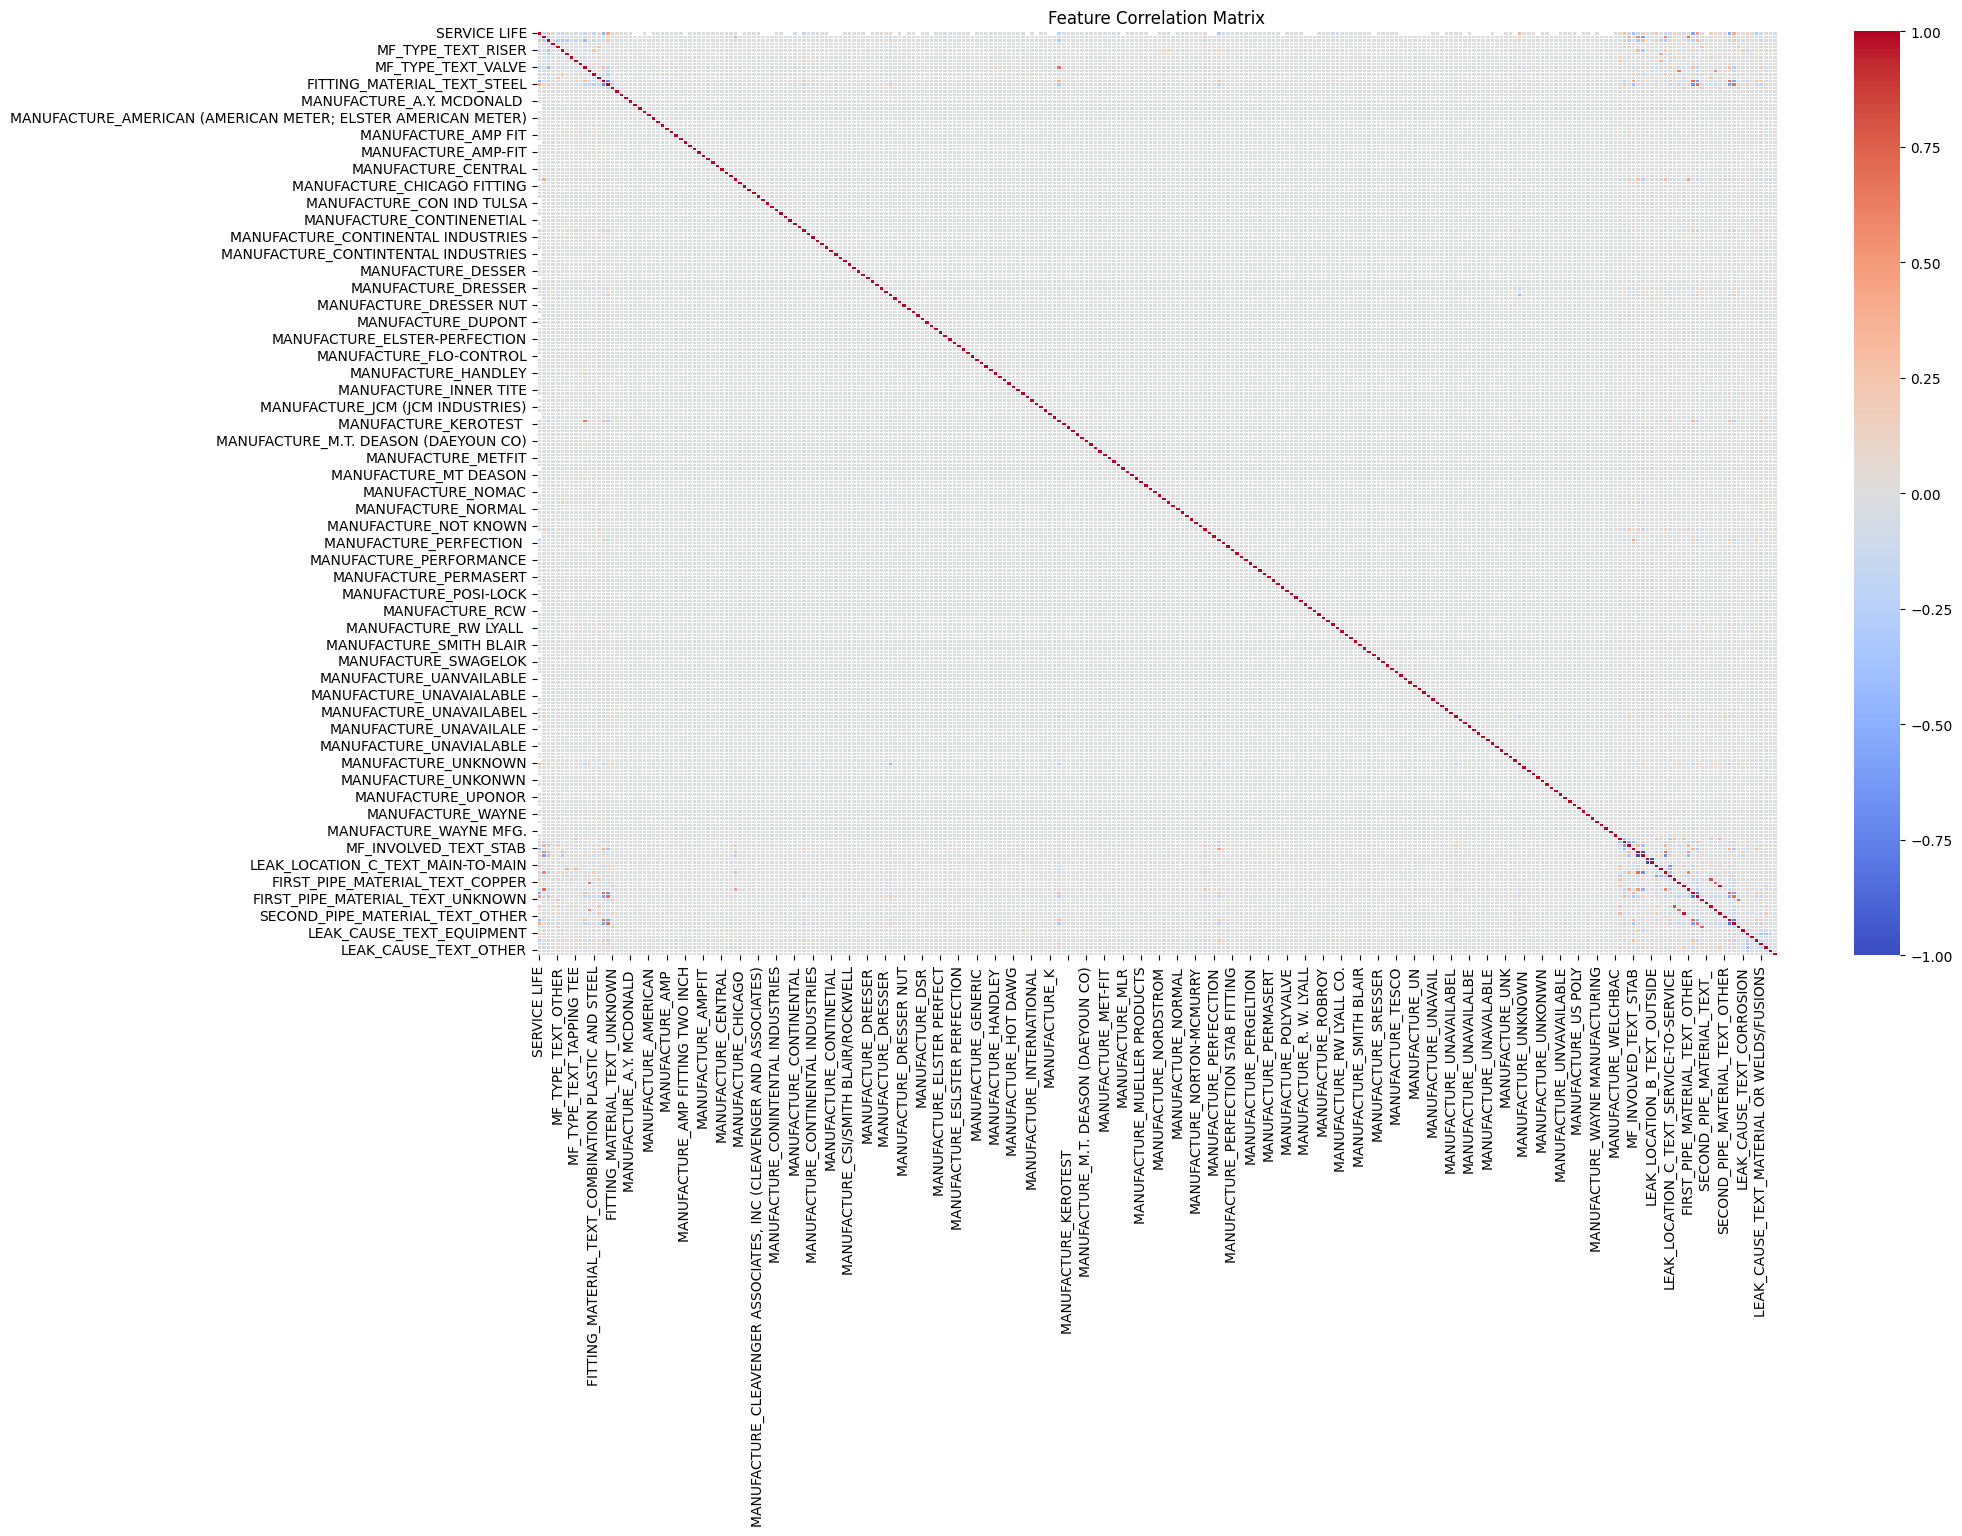

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Optional: Filter to only the top features or numeric columns
# corr_matrix = corr_matrix[['SERVICE_LIFE'] + [col for col in df_encoded.columns if col.startswith('MF_TYPE_TEXT_')]]

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['LEAK_CAUSE_ENCODED'] = le.fit_transform(df['LEAK_CAUSE_TEXT'])


/tmp/ipython-input-30-3473226468.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded['LEAK_CAUSE_ENCODED'] = le.fit_transform(df['LEAK_CAUSE_TEXT'])


In [ ]:
target_corr = df_encoded.corr()['LEAK_CAUSE_ENCODED'].drop('LEAK_CAUSE_ENCODED').sort_values(ascending=False)
print(target_corr.head(15))  # Top predictors


LEAK_CAUSE_TEXT_NATURAL FORCES                0.530825
LEAK_CAUSE_TEXT_OTHER                         0.498934
LEAK_CAUSE_TEXT_MATERIAL OR WELDS/FUSIONS     0.299367
LEAK_CAUSE_TEXT_OTHER OUTSIDE FORCE DAMAGE    0.187507
FITTING_MATERIAL_TEXT_PLASTIC                 0.123854
FIRST_PIPE_MATERIAL_TEXT_DUCTILE IRON         0.119216
FIRST_PIPE_MATERIAL_TEXT_PLASTIC              0.117700
SECOND_PIPE_MATERIAL_TEXT_DUCTILE IRON        0.117450
SECOND_PIPE_MATERIAL_TEXT_PLASTIC             0.101132
MF_INVOLVED_TEXT_STAB                         0.093057
FITTING_MATERIAL_TEXT_UNKNOWN                 0.092405
MF_INVOLVED_TEXT_BOLTED                       0.084503
LEAK_LOCATION_A_TEXT_BELOWGROUND              0.084010
MANUFACTURE_PERFECTION                        0.073130
MANUFACTURE_NORMAC (NORTON MCMURRAY)          0.070011
Name: LEAK_CAUSE_ENCODED, dtype: float64


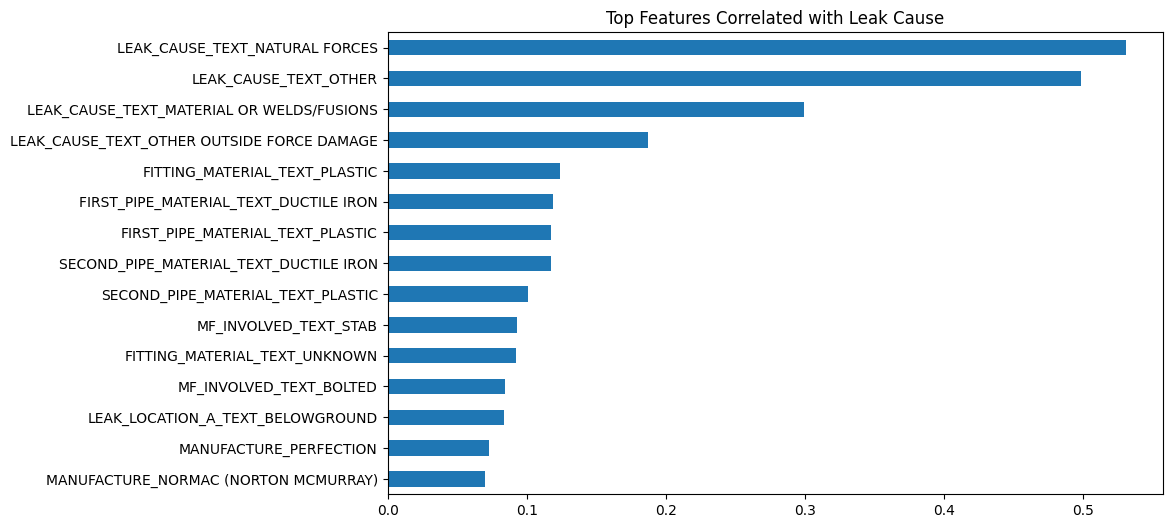

In [ ]:
import matplotlib.pyplot as plt

target_corr.head(15).plot(kind='barh', figsize=(10,6), title='Top Features Correlated with Leak Cause')
plt.gca().invert_yaxis()
plt.show()


/tmp/ipython-input-33-4164460625.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='LEAK_CAUSE_TEXT', order=df['LEAK_CAUSE_TEXT'].value_counts().index, palette='Set2')


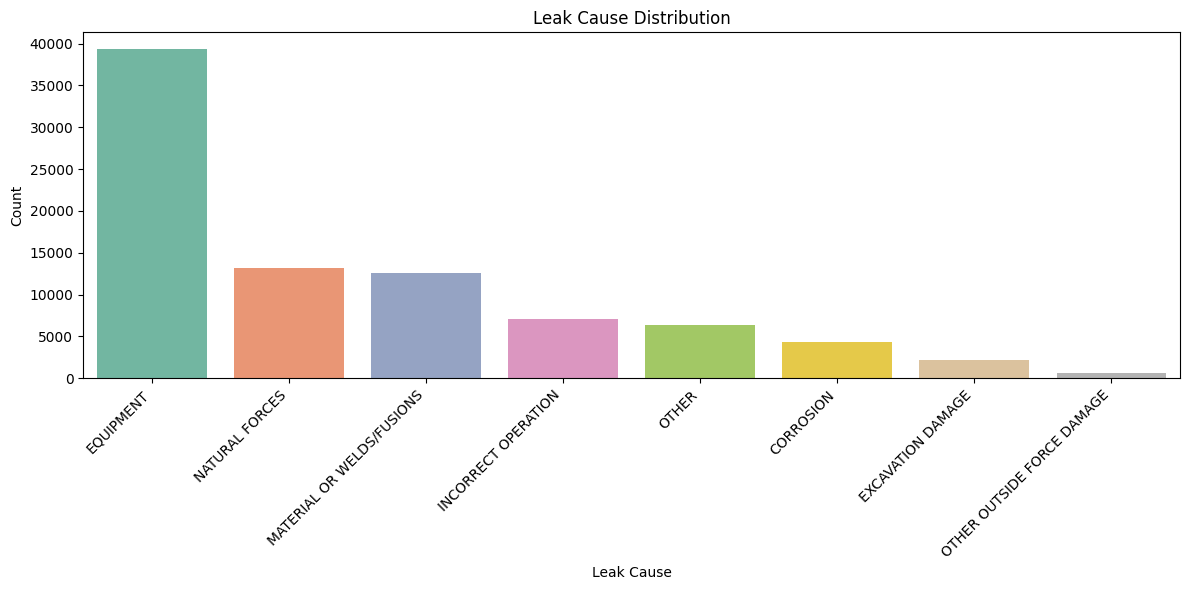

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called df and target is 'LEAK_CAUSE_TEXT'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='LEAK_CAUSE_TEXT', order=df['LEAK_CAUSE_TEXT'].value_counts().index, palette='Set2')
plt.title("Leak Cause Distribution")
plt.xlabel("Leak Cause")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


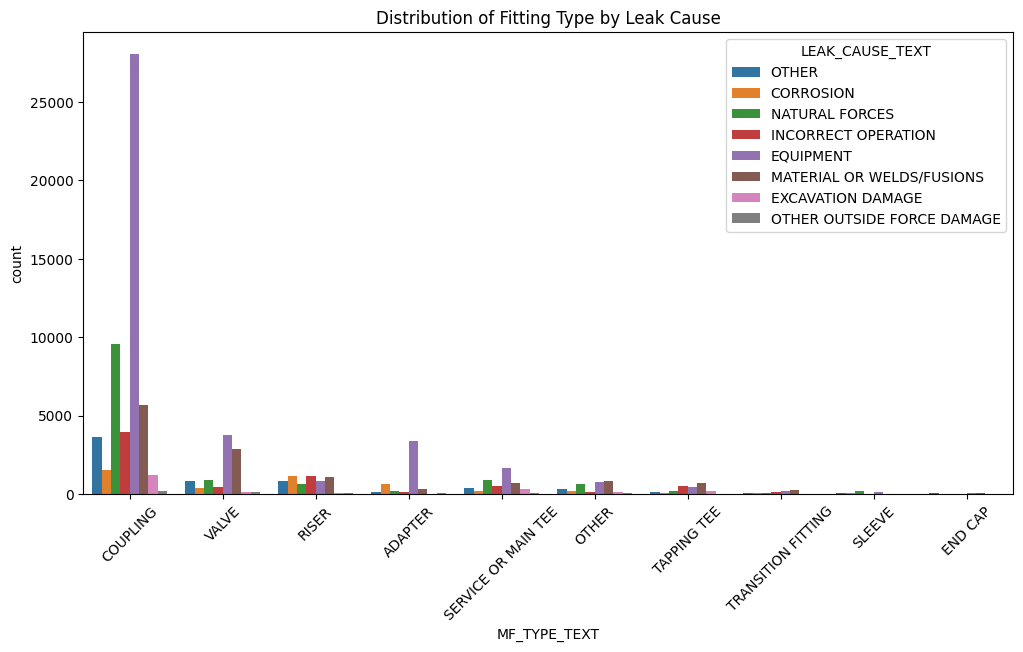

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: How MF_TYPE_TEXT is distributed per leak cause
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='MF_TYPE_TEXT', hue='LEAK_CAUSE_TEXT', order=df['MF_TYPE_TEXT'].value_counts().index)
plt.title("Distribution of Fitting Type by Leak Cause")
plt.xticks(rotation=45)
plt.show()


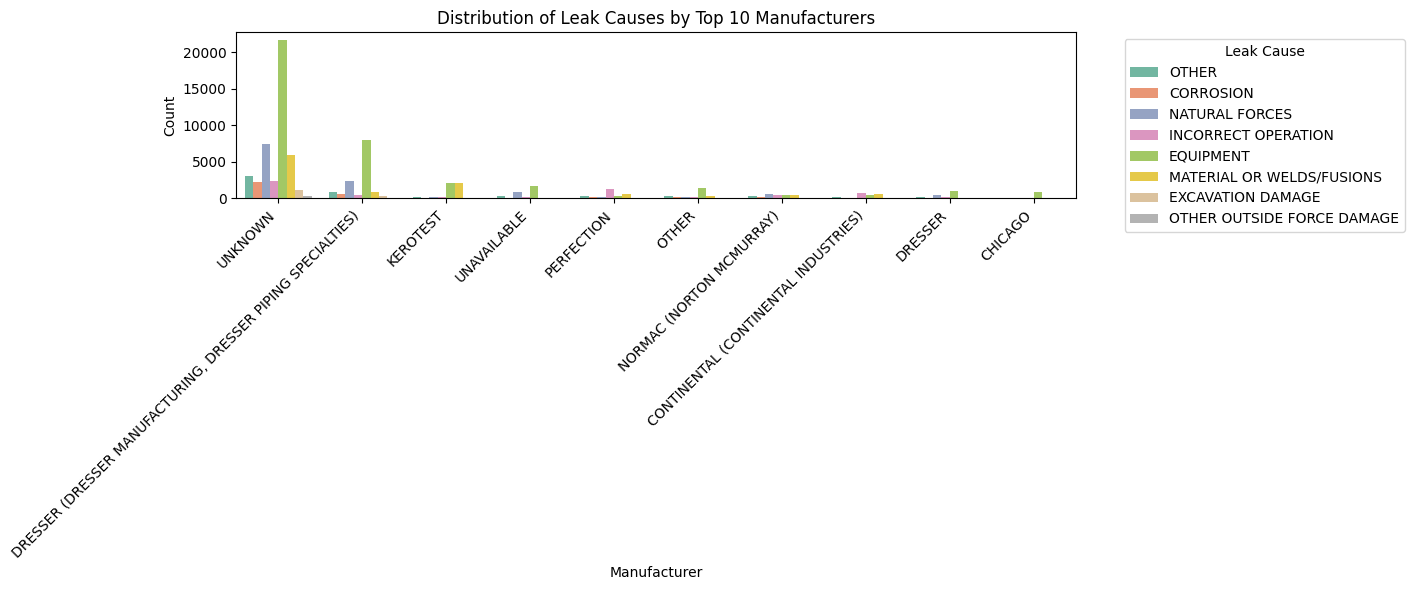

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count top 10 manufacturers
top_manu = df['MANUFACTURE'].value_counts().nlargest(10).index

# Filter for those top manufacturers
df_top_manu = df[df['MANUFACTURE'].isin(top_manu)]

# Plot
plt.figure(figsize=(14, 6))
sns.countplot(data=df_top_manu, x='MANUFACTURE', hue='LEAK_CAUSE_TEXT', order=top_manu, palette='Set2')
plt.title("Distribution of Leak Causes by Top 10 Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Leak Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-36-423956017.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='LEAK_CAUSE_TEXT', y='SERVICE LIFE', palette='Set3')


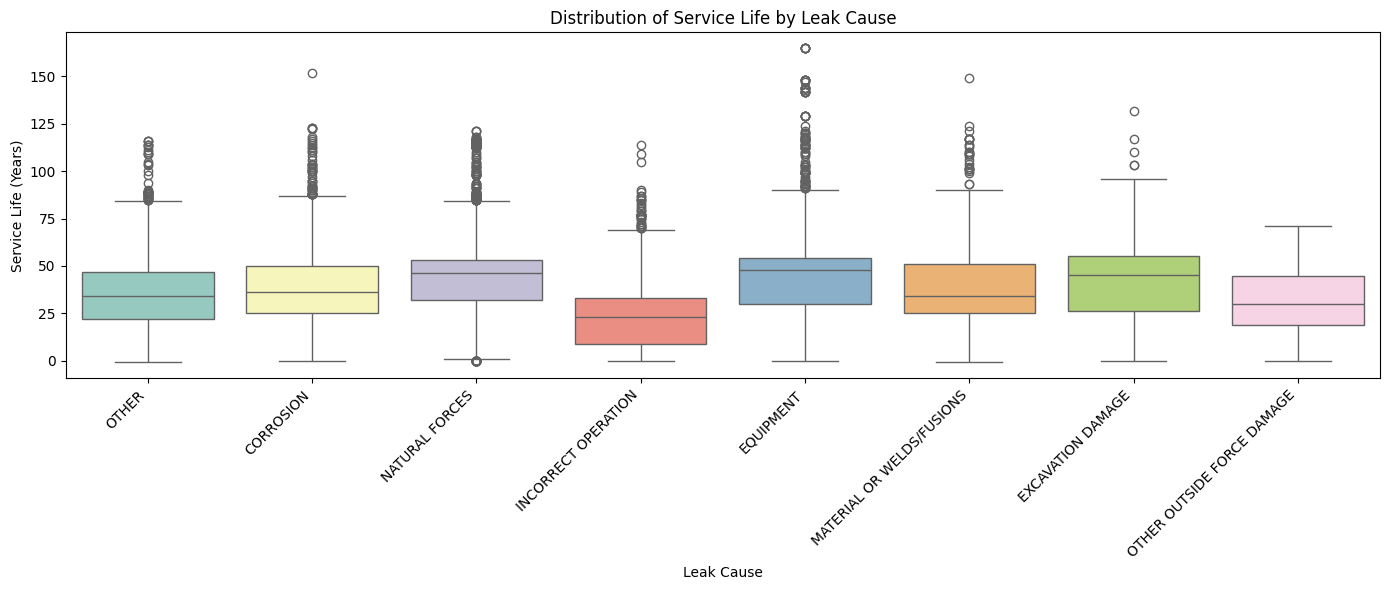

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='LEAK_CAUSE_TEXT', y='SERVICE LIFE', palette='Set3')
plt.title("Distribution of Service Life by Leak Cause")
plt.xlabel("Leak Cause")
plt.ylabel("Service Life (Years)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


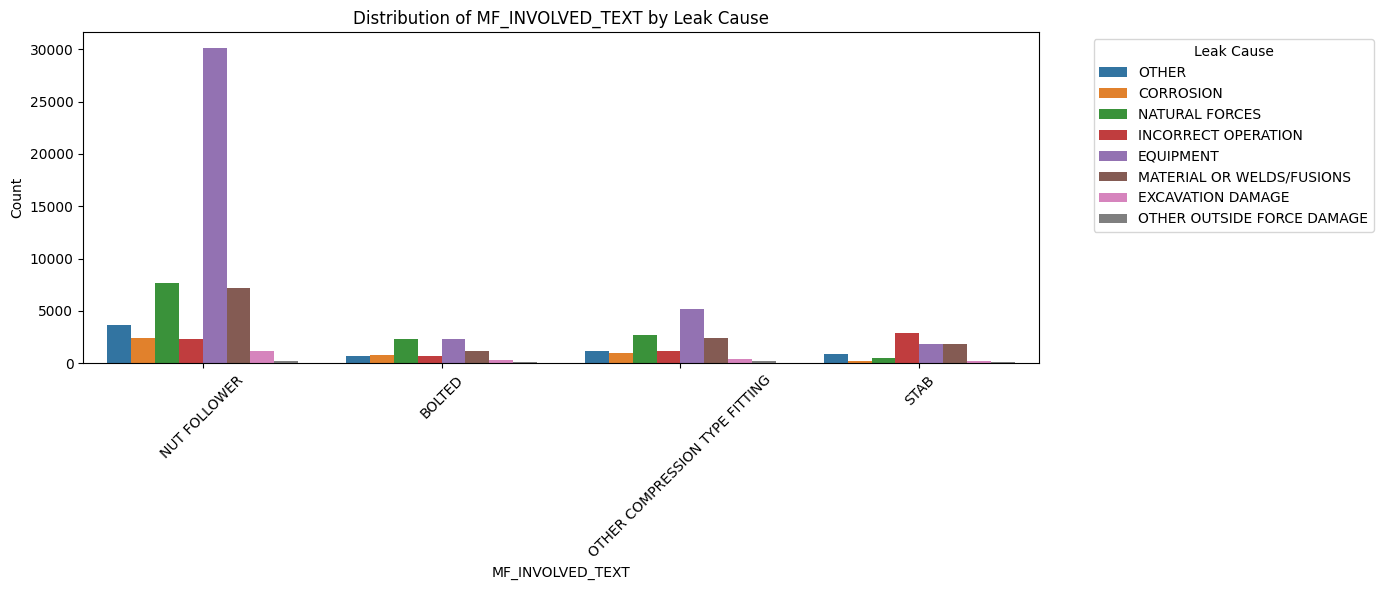

In [ ]:

# Drop rows with missing values in relevant columns
df_plot = df[['MF_INVOLVED_TEXT', 'LEAK_CAUSE_TEXT']].dropna()

# Create a countplot for MF_INVOLVED_TEXT by LEAK_CAUSE_TEXT
plt.figure(figsize=(14, 6))
sns.countplot(data=df_plot, x='MF_INVOLVED_TEXT', hue='LEAK_CAUSE_TEXT')
plt.title('Distribution of MF_INVOLVED_TEXT by Leak Cause')
plt.xlabel('MF_INVOLVED_TEXT')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Leak Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


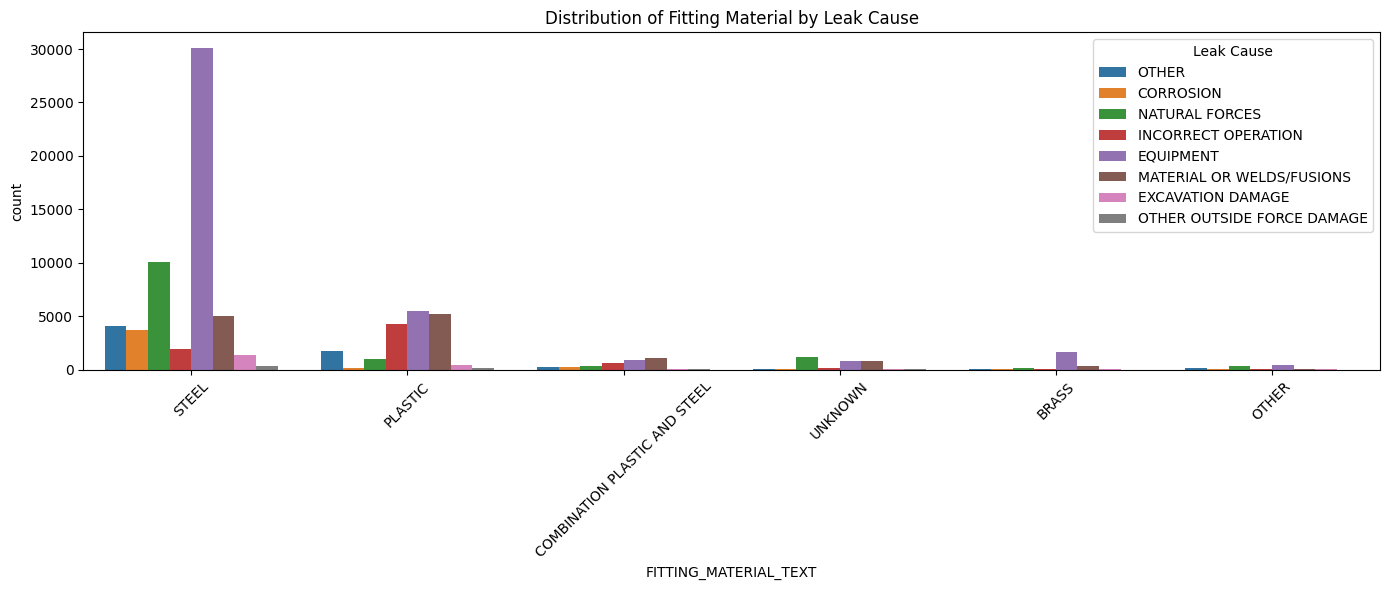

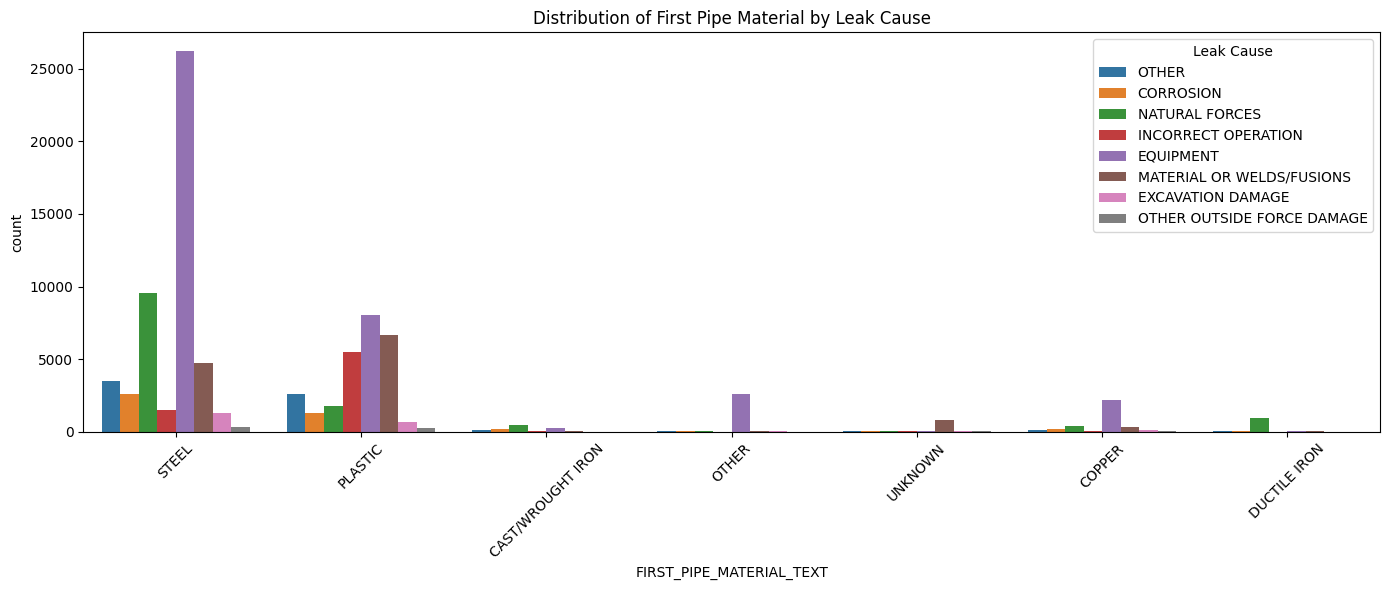

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reload cleaned dataframe with categorical values (assuming it's still in memory)
# Plot 1: FITTING_MATERIAL_TEXT vs LEAK_CAUSE_TEXT
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='FITTING_MATERIAL_TEXT', hue='LEAK_CAUSE_TEXT')
plt.title('Distribution of Fitting Material by Leak Cause')
plt.xticks(rotation=45)
plt.legend(title='Leak Cause')
plt.tight_layout()
plt.show()

# Plot 2: FIRST_PIPE_MATERIAL_TEXT vs LEAK_CAUSE_TEXT
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='FIRST_PIPE_MATERIAL_TEXT', hue='LEAK_CAUSE_TEXT')
plt.title('Distribution of First Pipe Material by Leak Cause')
plt.xticks(rotation=45)
plt.legend(title='Leak Cause')
plt.tight_layout()
plt.show()


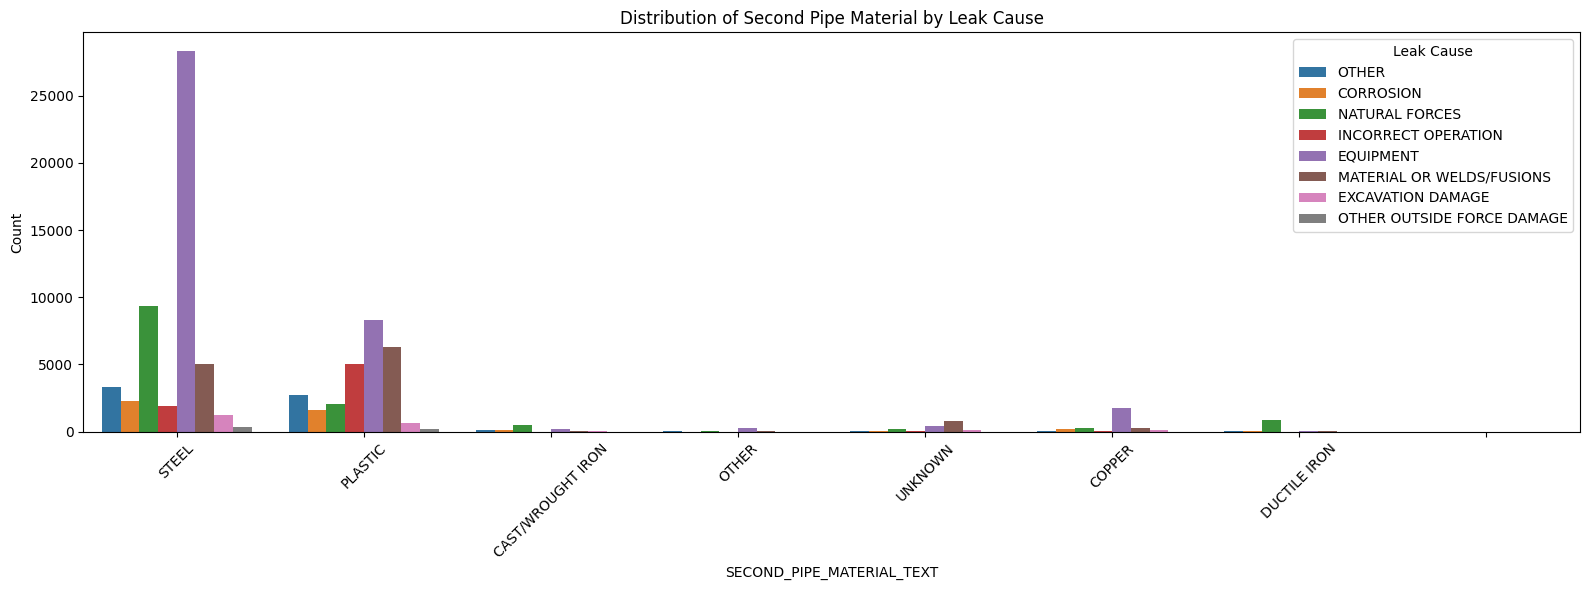

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='SECOND_PIPE_MATERIAL_TEXT', hue='LEAK_CAUSE_TEXT')
plt.title('Distribution of Second Pipe Material by Leak Cause')
plt.xlabel('SECOND_PIPE_MATERIAL_TEXT')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Leak Cause')
plt.tight_layout()
plt.show()


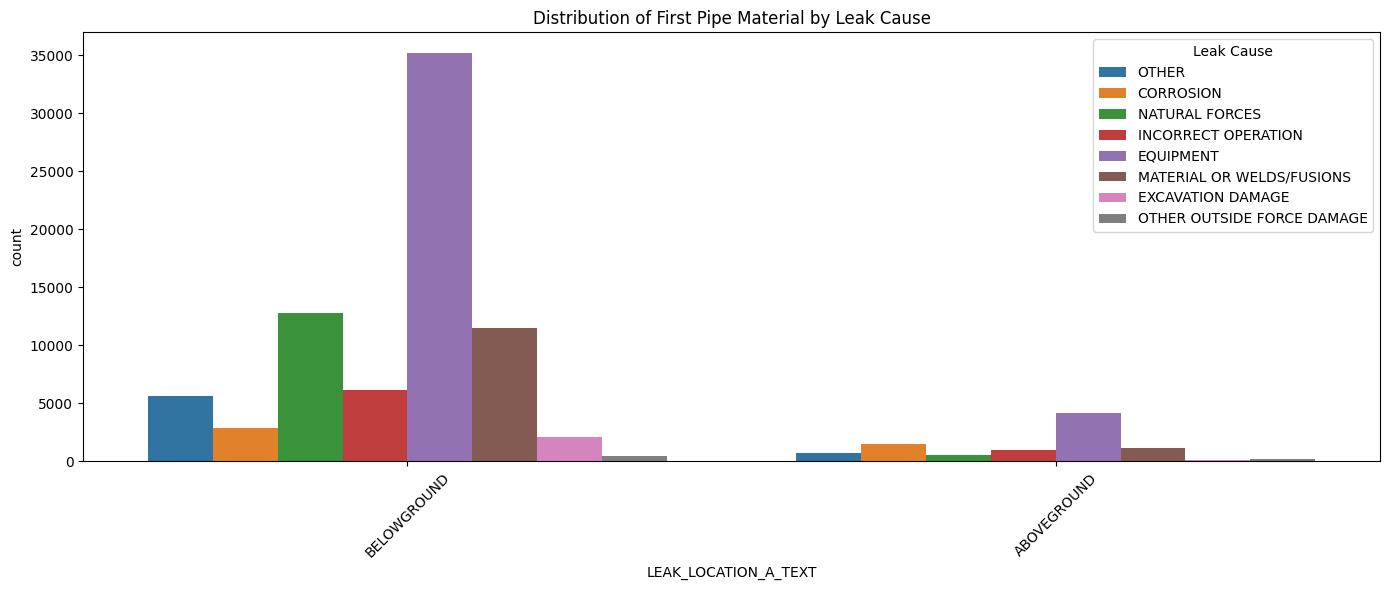

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='LEAK_LOCATION_A_TEXT', hue='LEAK_CAUSE_TEXT')
plt.title('Distribution of First Pipe Material by Leak Cause')
plt.xticks(rotation=45)
plt.legend(title='Leak Cause')
plt.tight_layout()
plt.show()

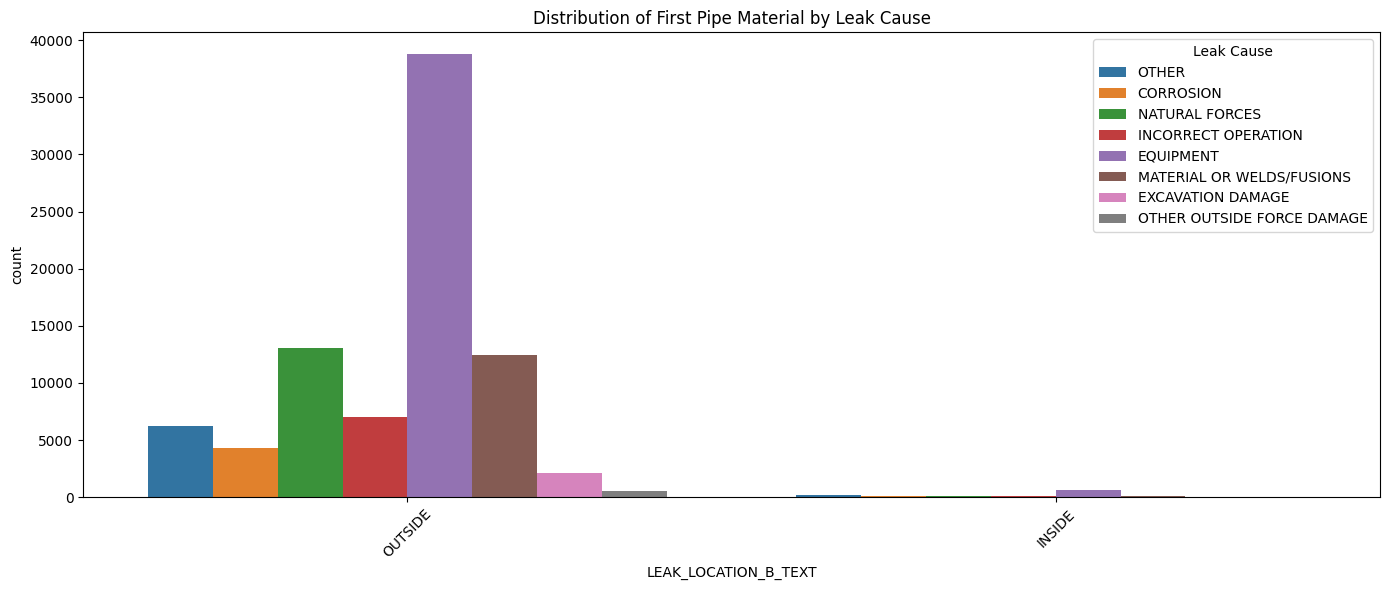

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='LEAK_LOCATION_B_TEXT', hue='LEAK_CAUSE_TEXT')
plt.title('Distribution of First Pipe Material by Leak Cause')
plt.xticks(rotation=45)
plt.legend(title='Leak Cause')
plt.tight_layout()
plt.show()

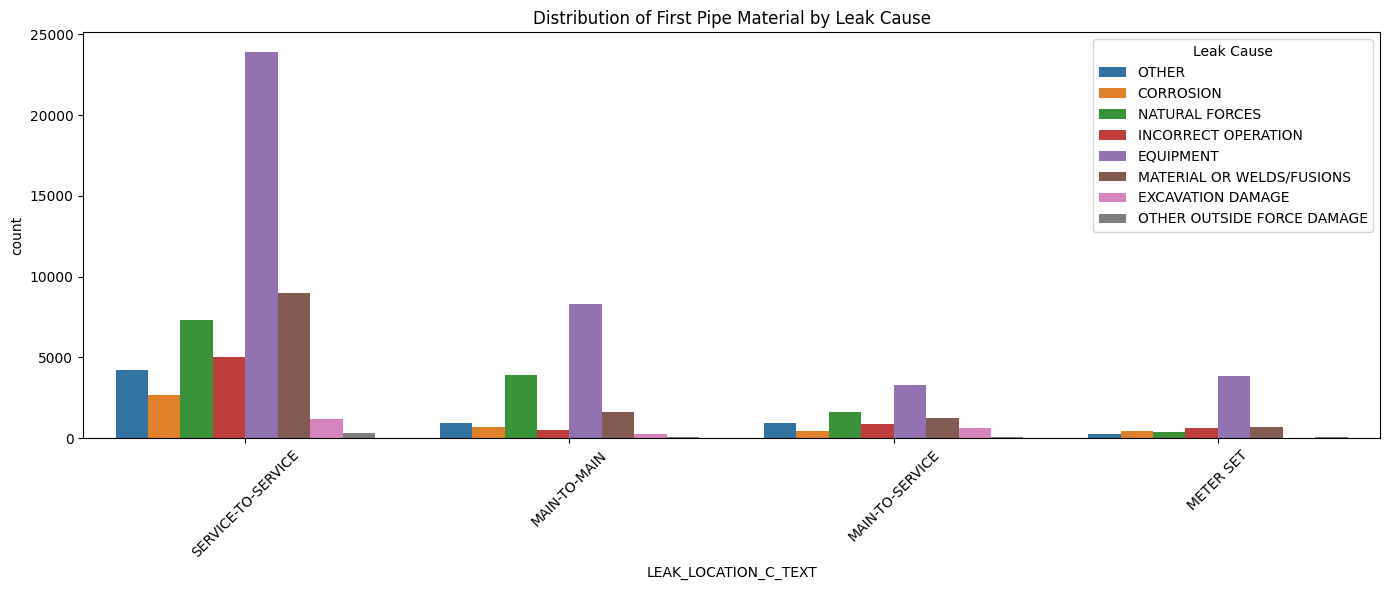

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='LEAK_LOCATION_C_TEXT', hue='LEAK_CAUSE_TEXT')
plt.title('Distribution of First Pipe Material by Leak Cause')
plt.xticks(rotation=45)
plt.legend(title='Leak Cause')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MF_INVOLVED_TEXT           85611 non-null  object 
 1   MF_TYPE_TEXT               85611 non-null  object 
 2   LEAK_LOCATION_A_TEXT       85602 non-null  object 
 3   LEAK_LOCATION_B_TEXT       85611 non-null  object 
 4   LEAK_LOCATION_C_TEXT       85611 non-null  object 
 5   MANUFACTURE                85558 non-null  object 
 6   FITTING_MATERIAL_TEXT      85611 non-null  object 
 7   FIRST_PIPE_MATERIAL_TEXT   85611 non-null  object 
 8   SECOND_PIPE_MATERIAL_TEXT  85316 non-null  object 
 9   LEAK_CAUSE_TEXT            85611 non-null  object 
 10  SERVICE LIFE               56846 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.2+ MB


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Columns: 273 entries, SERVICE LIFE to LEAK_CAUSE_ENCODED
dtypes: float64(1), int64(272)
memory usage: 178.3 MB


In [ ]:
print(df_encoded.columns)

Index(['SERVICE LIFE', 'MF_TYPE_TEXT_ADAPTER', 'MF_TYPE_TEXT_COUPLING',
       'MF_TYPE_TEXT_END CAP', 'MF_TYPE_TEXT_OTHER', 'MF_TYPE_TEXT_RISER',
       'MF_TYPE_TEXT_SERVICE OR MAIN TEE', 'MF_TYPE_TEXT_SLEEVE',
       'MF_TYPE_TEXT_TAPPING TEE', 'MF_TYPE_TEXT_TRANSITION FITTING',
       ...
       'SECOND_PIPE_MATERIAL_TEXT_UNKNOWN', 'LEAK_CAUSE_TEXT_CORROSION',
       'LEAK_CAUSE_TEXT_EQUIPMENT', 'LEAK_CAUSE_TEXT_EXCAVATION DAMAGE',
       'LEAK_CAUSE_TEXT_INCORRECT OPERATION',
       'LEAK_CAUSE_TEXT_MATERIAL OR WELDS/FUSIONS',
       'LEAK_CAUSE_TEXT_NATURAL FORCES', 'LEAK_CAUSE_TEXT_OTHER',
       'LEAK_CAUSE_TEXT_OTHER OUTSIDE FORCE DAMAGE', 'LEAK_CAUSE_ENCODED'],
      dtype='object', length=273)


In [ ]:
df_encoded['LEAK_CAUSE_ENCODED'].unique()


array([6, 0, 5, 3, 1, 4, 2, 7])

In [ ]:
# Select columns
columns_to_keep =  [col for col in df_encoded.columns if col.startswith('MF_INVOLVED_TEXT_') or col.startswith('FITTING_MATERIAL_TEXT_') or col.startswith('FIRST_PIPE_MATERIAL_TEXT_') or col.startswith('SECOND_PIPE_MATERIAL_TEXT_')]

# Create new dataframe with only selected columns
X_important = df_encoded[columns_to_keep]

# Display the first few rows of the new dataframe
display(X_important.head())

,FITTING_MATERIAL_TEXT_BRASS,FITTING_MATERIAL_TEXT_COMBINATION PLASTIC AND STEEL,FITTING_MATERIAL_TEXT_OTHER,FITTING_MATERIAL_TEXT_PLASTIC,FITTING_MATERIAL_TEXT_STEEL,FITTING_MATERIAL_TEXT_UNKNOWN,MF_INVOLVED_TEXT_BOLTED,MF_INVOLVED_TEXT_NUT FOLLOWER,MF_INVOLVED_TEXT_OTHER COMPRESSION TYPE FITTING,MF_INVOLVED_TEXT_STAB,...,FIRST_PIPE_MATERIAL_TEXT_STEEL,FIRST_PIPE_MATERIAL_TEXT_UNKNOWN,SECOND_PIPE_MATERIAL_TEXT_,SECOND_PIPE_MATERIAL_TEXT_CAST/WROUGHT IRON,SECOND_PIPE_MATERIAL_TEXT_COPPER,SECOND_PIPE_MATERIAL_TEXT_DUCTILE IRON,SECOND_PIPE_MATERIAL_TEXT_OTHER,SECOND_PIPE_MATERIAL_TEXT_PLASTIC,SECOND_PIPE_MATERIAL_TEXT_STEEL,SECOND_PIPE_MATERIAL_TEXT_UNKNOWN
0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
y = df_encoded['LEAK_CAUSE_ENCODED']

print("Shape of X:", X_important.shape)
print("Shape of y:", y.shape)

Shape of X: (85611, 25)
Shape of y: (85611,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_important, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model1 = RandomForestClassifier(class_weight='balanced')
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)


In [ ]:
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.20      0.60      0.30       866
           1       0.66      0.65      0.66      7874
           2       0.07      0.06      0.07       425
           3       0.35      0.55      0.43      1414
           4       0.41      0.31      0.36      2510
           5       0.54      0.27      0.36      2646
           6       0.23      0.02      0.04      1273
           7       0.02      0.15      0.04       115

    accuracy                           0.47     17123
   macro avg       0.31      0.33      0.28     17123
weighted avg       0.50      0.47      0.46     17123



In [ ]:
X_filled = X_important.fillna(X_important.mean(numeric_only=True))
y_filled = y[X_filled.index]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. SMOTE Oversampling
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_filled, y_filled)

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, stratify=y_res, test_size=0.2, random_state=42)

# 3. Model Training
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.20      0.60      0.30       866
           1       0.66      0.65      0.66      7874
           2       0.07      0.06      0.07       425
           3       0.35      0.55      0.43      1414
           4       0.41      0.31      0.36      2510
           5       0.54      0.27      0.36      2646
           6       0.23      0.02      0.04      1273
           7       0.02      0.15      0.04       115

    accuracy                           0.47     17123
   macro avg       0.31      0.33      0.28     17123
weighted avg       0.50      0.47      0.46     17123

